In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
import keras.backend as K
%matplotlib inline

Using TensorFlow backend.


# MNIST DATASET

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

11091968/11490434 [===========================>..] - ETA: 0s

((60000, 28, 28), (60000,))

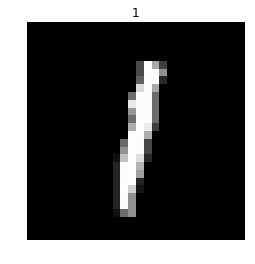

In [9]:
random_idx = np.random.choice(60000)
plt.imshow(x_train[random_idx], 'gray')
plt.title(y_train[random_idx])
plt.axis('off');

In [10]:
# Preprocesar las imagenes
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

# Redimensionar las imagenes
x_train = x_train.reshape((-1,28*28))
x_test = x_test.reshape((-1,28*28))

x_train.shape, y_train.shape

((60000, 784), (60000,))

In [11]:
y_train[0]

5

In [12]:
# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

# Construyendo el modelo en Keras

In [18]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01), # <--- learning rate
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [19]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 1.0778 - acc: 0.6923 - val_loss: 0.5603 - val_acc: 0.8480
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.4862 - acc: 0.8661 - val_loss: 0.4038 - val_acc: 0.8858
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.3958 - acc: 0.8878 - val_loss: 0.3633 - val_acc: 0.8970
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.3557 - acc: 0.8981 - val_loss: 0.3266 - val_acc: 0.9067
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.3303 - acc: 0.9048 - val_loss: 0.3113 - val_acc: 0.9107


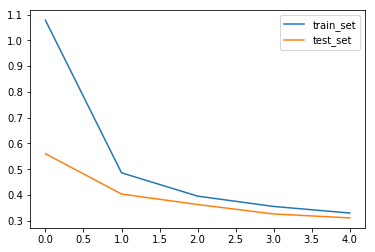

In [20]:
def plot_training(log):
    plt.plot(log.history['loss'], label='train_set')
    plt.plot(log.history['val_loss'], label='test_set')
    plt.legend()
    
plot_training(log)

result = 5


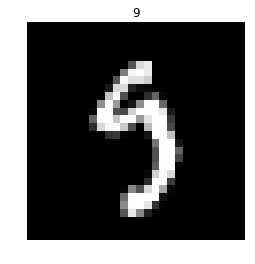

In [39]:
idx = np.random.choice(len(x_test))
sample_x = x_test[idx]
sample_y = y_test[idx]
plt.imshow(sample_x.reshape((28,28)), 'gray')
plt.title(np.argmax(sample_y))
plt.axis('off');

result = model.predict(sample_x[None])
result = np.argmax(result)

print(f'result = {result}')

# Usando convoluciones

In [40]:
# Dimensionar las imagenes
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [41]:
model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax', input_shape=(784,)))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


In [42]:
log = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s - loss: 1.8351 - acc: 0.5204 - val_loss: 0.9049 - val_acc: 0.8052
Epoch 2/5
60000/60000 [==============================] - 17s - loss: 0.5282 - acc: 0.8663 - val_loss: 0.3489 - val_acc: 0.9049
Epoch 3/5
60000/60000 [==============================] - 17s - loss: 0.3198 - acc: 0.9091 - val_loss: 0.2652 - val_acc: 0.9242
Epoch 4/5
60000/60000 [==============================] - 18s - loss: 0.2544 - acc: 0.9278 - val_loss: 0.2241 - val_acc: 0.9381
Epoch 5/5
60000/60000 [==============================] - 18s - loss: 0.2150 - acc: 0.9391 - val_loss: 0.1883 - val_acc: 0.9464


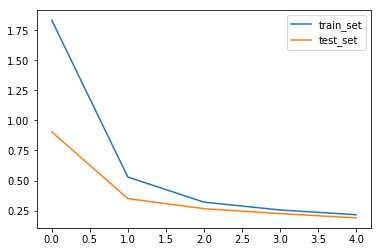

In [43]:
plot_training(log)

result = 5


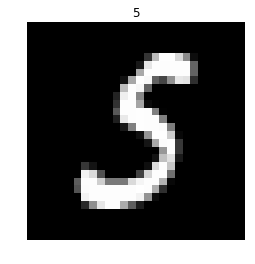

In [51]:
idx = np.random.choice(len(x_test))
sample_x = x_test[idx]
sample_y = y_test[idx]
plt.imshow(sample_x.reshape((28,28)), 'gray')
plt.title(np.argmax(sample_y))
plt.axis('off');

result = model.predict(sample_x[None])
result = np.argmax(result)

print(f'result = {result}')

# Visualizar los filtros

In [60]:
kernels = model.layers[2].kernel
kernels

<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 16, 32) dtype=float32_ref>

In [61]:
kernels = K.eval(kernels)
kernels.shape

(3, 3, 16, 32)

In [62]:
kernels = kernels[:,:,0,:]
kernels.shape

(3, 3, 32)

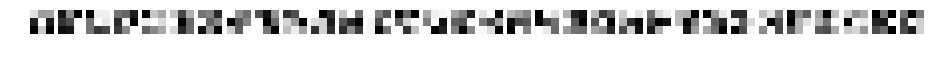

In [63]:
fig, axes = plt.subplots(1, kernels.shape[2], figsize=(16,4))

for i in range(kernels.shape[2]):
    axes[i].imshow(kernels[:,:,i], 'gray')
    axes[i].axis('off')